<a href="https://colab.research.google.com/github/1nakatan/modern-control/blob/master/Kalman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

以下の出力を，カルマンフィルタを用いて平滑化する．
なお，ノイズの共分散は既知とする．

$
\begin{eqnarray}
\boldsymbol{x}(k+1)&=&\boldsymbol{Ax}(k)+\boldsymbol{b}(u(k)+v(k)\\
y(k)&=&\boldsymbol{c}^\top \boldsymbol{x}(k)+\omega(k)
\end{eqnarray}
$

$A=\left [\begin{array}{c}
1.1269&-0.4940&0.1129\\
1&0&0\\
0&1&0
\end{array}\right]$,
$\boldsymbol{b}=\begin{bmatrix}
-0.3822\\
0.5919\\
0.5191
\end{bmatrix}$,
$\boldsymbol{c}=\begin{bmatrix}
1&0&0
\end{bmatrix}$,


システムのノイズの分散$Q=0.1$，観測ノイズの分散を$R=1.0$とする．

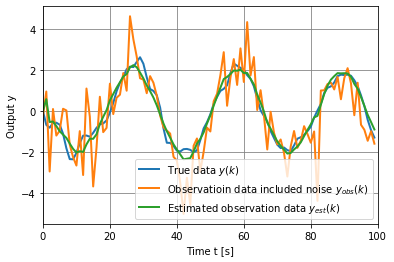

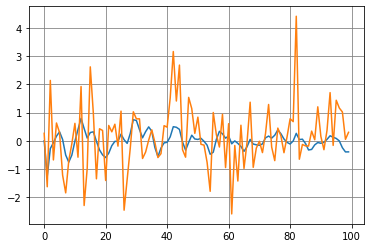

In [0]:
import matplotlib.pyplot as plt
import numpy as np

#時間設定
t = np.arange(0,100,1) #時刻0から10s まで
n = len(t)

#システムの定義
A = np.array([[1.126910,-0.494001,0.112900],[1,0,0],[0,1,0]])
b = np.array([[-0.3822],[0.5919],[0.5191]])
c = np.array([[1], [0], [0]]) 
Q=0.1
R=1

#初期値
x0 = [[1],[4],[2]]
x=np.zeros((3,n))
x[:,[0]]=x0;

#入力信号
u = np.sin(t/5)

#ノイズ生成
v = np.sqrt(Q) * np.random.randn(n,1)
w = np.sqrt(R) * np.random.randn(n,1)

#シミュレーションデータ生成
y=np.zeros((n,1))
P=np.eye(3)
for i in range(n-1):
  x[:,[i+1]] = A@x[:,[i]] + b*(u[i]+v[i])
  y[i+1] = c.reshape(1,3)@x[:,[i+1]]
yobs=y+w

#カルマンフィルタによる状態推定
xest = np.zeros((3,n))
for i in range(n-1):
#予測ステップ
  prex = A@xest[:,[i]] + b*u[i]
  preP = (A@P)@(A.T)+Q*(b@(b.T))
#フィルタリング
  gain = (preP@c)/(c.T@preP@c+R)
  xest[:,[i+1]] = prex + gain*(yobs[i+1]-c.T@prex)
  P = (np.eye(3)-(gain@c.T))@preP

#表示
plt.plot(t,y,label='True data $y(k)$', lw=2)  #真値
plt.plot(t,yobs,label='Observatioin data included noise $y_{obs}(k)$', lw=2)  #ノイズ入り観測値
plt.plot(t,(xest.T@c),label='Estimated observation data $y_{est}(k)$', lw=2)  #カルマンフィルタ
plt.grid(color='gray')
plt.ylabel('Output y')
plt.xlabel('Time t [s]')
plt.xlim([0, 100])
plt.legend()
plt.show()

plt.plot(t,y-(xest.T@c))
plt.plot(t,y-yobs)
plt.grid(color='gray')
plt.show()